Found 4998 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


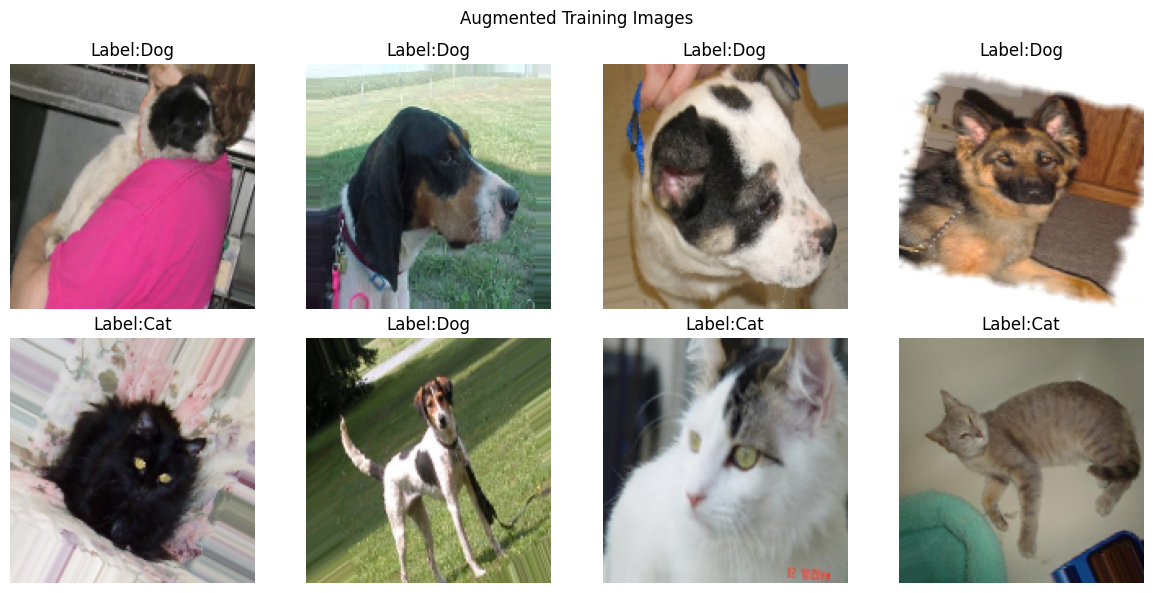

c:\Users\acer\Desktop\CNN\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\acer\Desktop\CNN\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 63/625 ━━━━━━━━━━━━━━━━━━━━ 10:13 1s/step - accuracy: 0.4990 - loss: 1.0821

c:\Users\acer\Desktop\CNN\venv\Lib\site-packages\PIL\TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 ━━━━━━━━━━━━━━━━━━━━ 1422s 2s/step - accuracy: 0.5925 - loss: 0.6670 - val_accuracy: 0.6898 - val_loss: 0.5796
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 877s 1s/step - accuracy: 0.7172 - loss: 0.5477 - val_accuracy: 0.7563 - val_loss: 0.4974
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 730s 1s/step - accuracy: 0.7588 - loss: 0.4913 - val_accuracy: 0.7746 - val_loss: 0.4730
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 637s 1s/step - accuracy: 0.7883 - loss: 0.4500 - val_accuracy: 0.7933 - val_loss: 0.4412
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 870s 1s/step - accuracy: 0.8051 - loss: 0.4225 - val_accuracy: 0.8102 - val_loss: 0.4084


In [1]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

train_datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, #20% as test set
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True)

train_generator=train_datagen.flow_from_directory(
    'Dataset',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='validation',  #This is nowour test set
    shuffle=True
)
train_generator=train_datagen.flow_from_directory(
    'Dataset',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='training',  #This is nowour test set
    shuffle=True)

import numpy as np

#Get one batch of imagesand labels 
images,labels=next(train_generator)

#plot a few argument images
plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i])
    plt.title(f"Label:{'Dog' if labels[i]==1 else 'Cat'}")
    plt.axis('off')
plt.suptitle("Augmented Training Images")
plt.tight_layout()
plt.show()
              
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),  #Binary Classification
    
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=train_generator)